# AP Summative Assessment - Plots

In [1]:
#Importing packages
import matplotlib.pyplot as plt
import mysql.connector
import numpy as np
import pandas as pd 
import pymysql
import pyodbc
import re
import sqlalchemy
import tkinter as tk
from datetime import datetime
from pandastable import Table
from sqlalchemy import create_engine
from sqlalchemy.types import DATE, FLOAT, INT, String, VARCHAR
from tkinter import *
from tkinter import ttk

### Fully visible plots

In [3]:
#Import data (originaly from SQL here from CSV)

#Import Inspections data
inspectionsdf = pd.read_csv("inspectionsSQL.csv")
#Filtering out 'INACTIVE' from 'program_status'(Inspections data)
inspections_data = inspectionsdf[inspectionsdf["program_status"] != "INACTIVE"]
    
#Import Inventory data    
inventory_data = pd.read_csv("inventorySQL.csv")

#Import Violations data
violations_data = pd.read_csv("violationsSQL.csv")

In [4]:
#Merge inspections and violations data 
violGraph = pd.merge(inspections_data, violations_data, on="serial_number", how='left')
pd.set_option('display.max_columns', None)
violGraph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841286 entries, 0 to 841285
Data columns (total 32 columns):
activity_date                                      841286 non-null object
owner_id                                           841286 non-null object
owner_name                                         841286 non-null object
facility_id                                        841286 non-null object
facility_name                                      841286 non-null object
record_id                                          841286 non-null object
program_name                                       841286 non-null object
program_status                                     841286 non-null object
program_element                                    841286 non-null int64
program_element_description                        841286 non-null object
facility_address                                   841286 non-null object
facility_city                                      841286 non-null object
fa

In [5]:
#Remove leading numbers/odd signs/letters and spaces from 'violation_description'
violGraph["violation_decription"] = violGraph["violation_decription"].str.replace(r"[^a-zA-Z\s]+", " ")
violGraph["violation_decription"] = violGraph["violation_decription"].str.strip()
violGraph["violation_decription"] = violGraph["violation_decription"].str.replace(r"(^[a-z]+)", "")

In [6]:
#Create dataframe: violations descriptions and no. of facilities committing each
uniqueFacViol = violGraph.groupby(by="violation_decription", as_index=False).agg({"facility_id": pd.Series.nunique})
pd.set_option('display.max_rows', None)

print(uniqueFacViol)

                                 violation_decription  facility_id
0                          Demonstration of knowledge         5102
1                           Food safety certification         9489
2                                 Hot Water Available         6846
3                                     Water available         1112
4   Adequate handwashing facilities supplied   acc...        18157
5   Adequate ventilation and lighting  designated ...        19111
6   Approved thawing methods used  frozen food mai...         5077
7                               Building rodent proof            1
8                            Ceiling maintained clean            1
9                   Ceiling maintained in good repair            2
10  Communicable disease  reporting  restrictions ...           27
11            Compliance with Gulf Oyster Regulations           37
12  Compliance with shelf stock tags  condition  d...          771
13  Compliance with variance  specialized process ...         

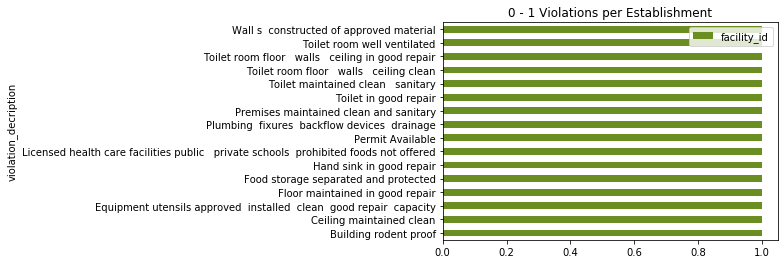

In [7]:
uniqueFacViol["violation_count"] = pd.cut(uniqueFacViol["facility_id"], [0, 1], labels=["0 - 1"])
df0 = uniqueFacViol
plot_df0 = df0.dropna()
plot_df0.plot(kind = "barh",x = "violation_decription", y = "facility_id", color = "olivedrab", title = "0 - 1 Violations per Establishment")

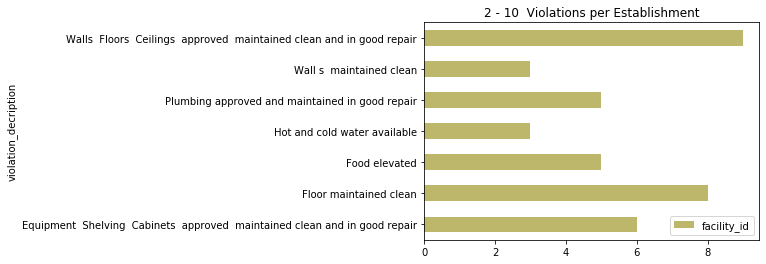

In [8]:
uniqueFacViol["violation_count"] = pd.cut(uniqueFacViol["facility_id"], [2, 10], labels=["2 - 10"])
dfX = uniqueFacViol
plot_dfX = dfX.dropna()
plot_dfX.plot(kind = "barh",x = "violation_decription", y = "facility_id", color = "darkkhaki", title = "2 - 10  Violations per Establishment")

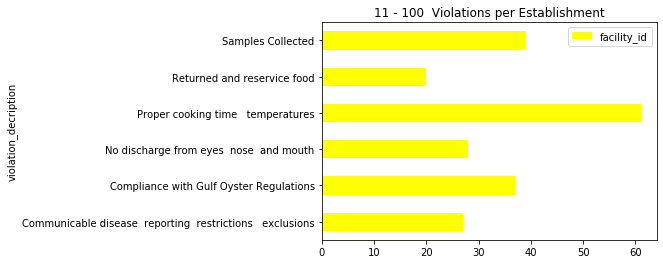

In [9]:
uniqueFacViol["violation_count"] = pd.cut(uniqueFacViol["facility_id"], [11, 100], labels=["11 - 100"])
dfC = uniqueFacViol
plot_dfC = dfC.dropna()
plot_dfC.plot(kind = "barh",x = "violation_decription", y = "facility_id", color = "yellow", title = "11 - 100  Violations per Establishment")

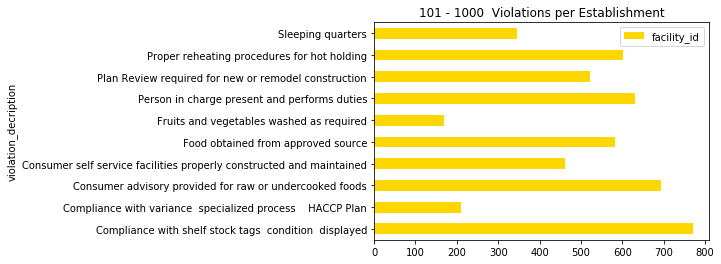

In [10]:
uniqueFacViol["violation_count"] = pd.cut(uniqueFacViol["facility_id"], [101, 1000], labels=["101-1000"])
dfM = uniqueFacViol
plot_dfM = dfM.dropna()
plot_dfM.plot(kind = "barh",x = "violation_decription", y = "facility_id", color = "gold", title = "101 - 1000  Violations per Establishment")

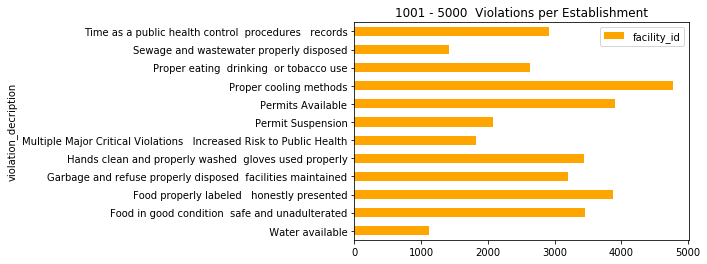

In [11]:
uniqueFacViol["violation_count"] = pd.cut(uniqueFacViol["facility_id"], [1001, 5000], labels=["1001-5000"])
dfMplus = uniqueFacViol
plot_dfMplus = dfMplus.dropna()
plot_dfMplus.plot(kind = "barh",x = "violation_decription", y = "facility_id", color = "orange", title = "1001 - 5000  Violations per Establishment")

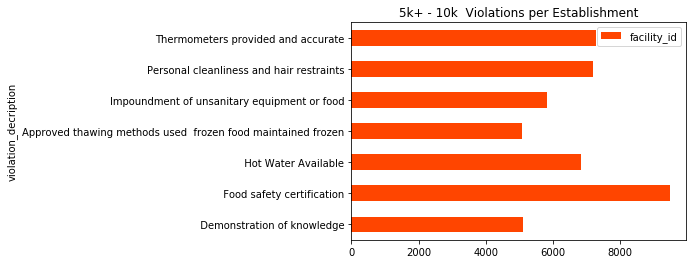

In [12]:
uniqueFacViol["violation_count"] = pd.cut(uniqueFacViol["facility_id"], [5001, 10000], labels=["5k+ - 10k"])
dfV = uniqueFacViol
plot_dfV = dfV.dropna()
plot_dfV.plot(kind = "barh",x = "violation_decription", y = "facility_id", color = "orangered", title = "5k+ - 10k  Violations per Establishment")

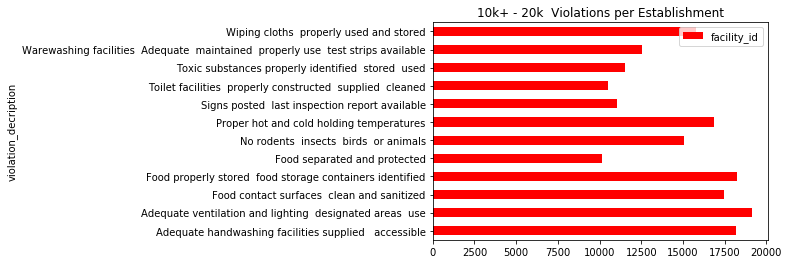

In [13]:
uniqueFacViol["violation_count"] = pd.cut(uniqueFacViol["facility_id"], [10001, 20000], labels=["10k+ - 20k"])
dfXk = uniqueFacViol
plot_dfXk = dfXk.dropna()
plot_dfXk.plot(kind = "barh",x = "violation_decription", y = "facility_id", color = "red", title = "10k+ - 20k  Violations per Establishment")

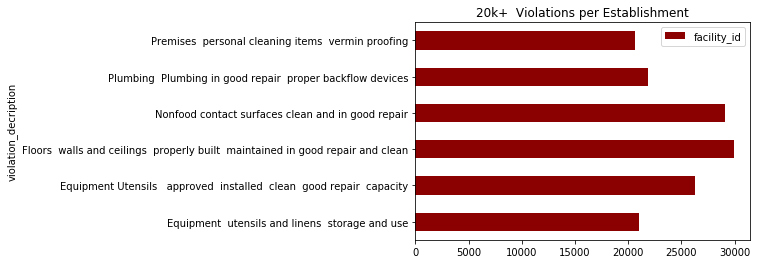

In [14]:
uniqueFacViol["violation_count"] = pd.cut(uniqueFacViol["facility_id"], [20001, np.inf], labels=["20k+"])
dfXXk = uniqueFacViol
plot_dfXXk = dfXXk.dropna()
plot_dfXXk.plot(kind = "barh",x = "violation_decription", y = "facility_id", color = "darkred", title = "20k+  Violations per Establishment")

## Violations per facility

In [15]:
#Group by 'facility_zip' and 'facility_id', count violations per facility

violVendor = violGraph.groupby(["facility_zip","facility_id"], as_index=False).agg({"violation_decription": pd.Series.nunique})

print(violVendor)

       facility_zip facility_id  violation_decription
0             90001   FA0002183                    19
1             90001   FA0002627                     7
2             90001   FA0004443                     5
3             90001   FA0004529                     4
4             90001   FA0004739                    13
5             90001   FA0004873                     5
6             90001   FA0005313                     8
7             90001   FA0005764                    23
8             90001   FA0005770                    19
9             90001   FA0006304                    21
10            90001   FA0007499                    12
11            90001   FA0007732                    22
12            90001   FA0009544                    21
13            90001   FA0010024                    23
14            90001   FA0011345                     7
15            90001   FA0011483                     9
16            90001   FA0011732                     6
17            90001   FA0012

In [16]:
#Violations per postcode
violperpostcode = violGraph.groupby(["facility_zip"], as_index=False).agg({"violation_decription": pd.Series.nunique})
print(violperpostcode)

     facility_zip  violation_decription
0           90001                    47
1           90002                    40
2           90003                    46
3           90004                    45
4           90005                    45
5           90006                    43
6           90007                    42
7           90008                    41
8           90010                    42
9           90011                    45
10          90012                    49
11          90013                    45
12          90014                    46
13          90015                    49
14          90016                    45
15          90017                    46
16          90018                    42
17          90019                    46
18          90020                    46
19          90021                    50
20          90022                    50
21          90023                    48
22          90024                    45
23          90025                    48


In [17]:
#Facilities per postcode
facperpostcode = violGraph.groupby(["facility_zip"], as_index=False).agg({"facility_id": pd.Series.nunique})
print(facperpostcode)

     facility_zip  facility_id
0           90001          225
1           90002           56
2           90003          220
3           90004          214
4           90005          218
5           90006          322
6           90007          208
7           90008           79
8           90010          156
9           90011          279
10          90012          378
11          90013          216
12          90014          196
13          90015          265
14          90016          128
15          90017          222
16          90018          100
17          90019          218
18          90020          256
19          90021          121
20          90022          278
21          90023          189
22          90024          182
23          90025          259
24          90026          240
25          90027          252
26          90028          430
27          90029          203
28          90030            2
29          90031          102
30          90032           95
31      

In [18]:
#Create correlation df
correlationdf = pd.DataFrame({"facility_zip": facperpostcode["facility_zip"], 
                              "facility_count_perzip": facperpostcode["facility_id"],
                              "violations_count_perzip": violperpostcode["violation_decription"]})
                       
correlationdf.sort_values(by=["violations_count_perzip"])

,facility_zip,facility_count_perzip,violations_count_perzip
132,90407,1,0
49,90053,1,0
324,91763,1,0
118,90295,1,1
125,90353,1,1
331,91771,1,1
355,93021,1,1
358,93124,1,3
294,91609,1,3
338,91784,1,3


In [19]:
#Average number of violations per facility in each zip
correlationdf["avg_viol_per_fac"] = (correlationdf["violations_count_perzip"] / correlationdf["facility_count_perzip"]).replace(np.inf, 0)
correlationdf.sort_values(by=["avg_viol_per_fac"])

,facility_zip,facility_count_perzip,violations_count_perzip,avg_viol_per_fac
49,90053,1,0,0.000000
132,90407,1,0,0.000000
324,91763,1,0,0.000000
26,90028,430,46,0.106977
43,90045,398,45,0.113065
316,91748,380,48,0.126316
10,90012,378,49,0.129630
112,90280,329,43,0.130699
5,90006,322,43,0.133540
100,90255,359,48,0.133705


In [20]:
#Check df by number of violations
correlationdf.sort_values(by=["violations_count_perzip"])

,facility_zip,facility_count_perzip,violations_count_perzip,avg_viol_per_fac
132,90407,1,0,0.000000
49,90053,1,0,0.000000
324,91763,1,0,0.000000
118,90295,1,1,1.000000
125,90353,1,1,1.000000
331,91771,1,1,1.000000
355,93021,1,1,1.000000
358,93124,1,3,3.000000
294,91609,1,3,3.000000
338,91784,1,3,3.000000


In [21]:
#Check df by number of facilities in each zip
correlationdf.sort_values(by=["facility_count_perzip"])

,facility_zip,facility_count_perzip,violations_count_perzip,avg_viol_per_fac
233,91314,1,13,13.000000
188,90808,1,5,5.000000
85,90231,1,18,18.000000
83,90225,1,9,9.000000
190,90813,1,12,12.000000
191,90921,1,15,15.000000
193,91004,1,12,12.000000
79,90214,1,9,9.000000
199,91018,1,9,9.000000
203,91029,1,17,17.000000


In [22]:
correlationdf.head()

,facility_zip,facility_count_perzip,violations_count_perzip,avg_viol_per_fac
0,90001,225,47,0.208889
1,90002,56,40,0.714286
2,90003,220,46,0.209091
3,90004,214,45,0.210280
4,90005,218,45,0.206422


In [23]:
#Count zip
correlationdf["zip_count"] = (1)
correlationdf.sort_values(by=["avg_viol_per_fac"])

,facility_zip,facility_count_perzip,violations_count_perzip,avg_viol_per_fac,zip_count
49,90053,1,0,0.000000,1
132,90407,1,0,0.000000,1
324,91763,1,0,0.000000,1
26,90028,430,46,0.106977,1
43,90045,398,45,0.113065,1
316,91748,380,48,0.126316,1
10,90012,378,49,0.129630,1
112,90280,329,43,0.130699,1
5,90006,322,43,0.133540,1
100,90255,359,48,0.133705,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231026B1C08>]],
      dtype=object)

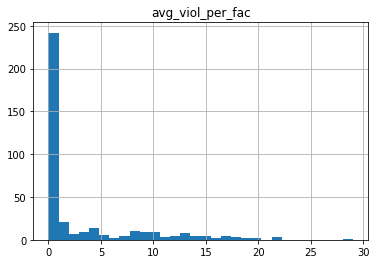

In [32]:
correlationdf.hist(column = 'avg_viol_per_fac', bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002310260DB08>]],
      dtype=object)

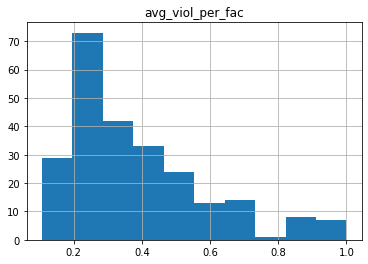

In [30]:
correlationdf["violavgcount"] = pd.cut(correlationdf["avg_viol_per_fac"], [0, 1], labels=["0-1"])
dfCor0 = correlationdf
plot_dfCor0 = dfCor0.dropna()
plot_dfCor0.hist(column = 'avg_viol_per_fac', bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231028B6688>]],
      dtype=object)

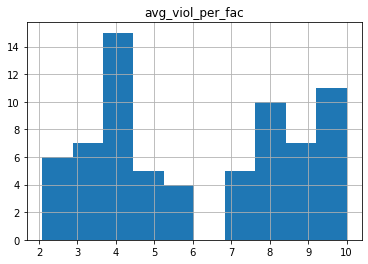

In [31]:
correlationdf["violavgcount"] = pd.cut(correlationdf["avg_viol_per_fac"], [2, 10], labels=["2-10"])
dfCor1 = correlationdf
plot_dfCor1 = dfCor1.dropna()
plot_dfCor1.hist(column = 'avg_viol_per_fac', bins = 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023103A33288>]],
      dtype=object)

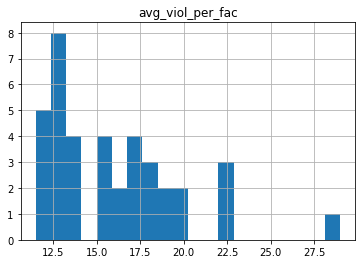

In [39]:
correlationdf["violavgcount"] = pd.cut(correlationdf["avg_viol_per_fac"], [11, np.inf], labels=["11+"])
dfCor11 = correlationdf
plot_dfCor11 = dfCor11.dropna()
plot_dfCor11.hist(column = 'avg_viol_per_fac', bins = 20)

In [33]:
#Pearsons
correlationdf["zip_count"].corr(correlationdf["avg_viol_per_fac"])

nan

In [34]:
#Spearmanr
correlationdf["zip_count"].corr(correlationdf["avg_viol_per_fac"], method='spearman')

nan

In [36]:
#Kendall
correlationdf["zip_count"].corr(correlationdf["avg_viol_per_fac"], method='kendall')

nan

### Correlation calculations (DO NOT USE)  

#### This calculates correlation between number of facilities and number of violations e.g. more facilities means more violations

In [104]:
#Pearsons
correlationdf["violations_count_perzip"].corr(correlationdf["facility_count_perzip"])

0.7627772190410681

In [106]:
#Spearmanr
correlationdf["violations_count_perzip"].corr(correlationdf["facility_count_perzip"], method='spearman')

0.8931466262354746

In [107]:
#Kendall
correlationdf["violations_count_perzip"].corr(correlationdf["facility_count_perzip"], method='kendall')

0.7374201817777377

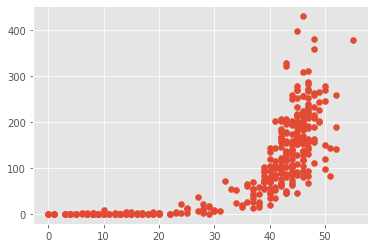

In [109]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

plt.scatter(correlationdf["violations_count_perzip"], correlationdf["facility_count_perzip"])
plt.show()

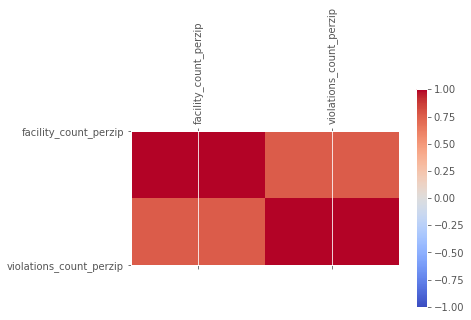

In [112]:
corr = correlationdf.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(correlationdf.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(correlationdf.columns)
ax.set_yticklabels(correlationdf.columns)
plt.show()